In [3]:
import numpy as np
import pandas as pd
from openpyxl import load_workbook
import math
import matplotlib.pyplot as plt
import yfinance as yf
import riskfolio.Portfolio as pf 

#Telechargement des donnees a partir de yahoo
yf.pdr_override()



In [4]:
#Collecte de donnees
actifs = ['^GSPC','XQQ.TO', 'RBOT.TO', 'XEG.TO', 'XST.TO', 'XUSR.TO', 'XCSR.TO', 'XDSR.TO', 'XRE.TO'] # XIT.TO RETIRÉ 10/01/2022, ESG all around GGRO.TO (includes fixed income)
actifs.sort()

#Dates
import datetime 
today = datetime.datetime.today()
yesterday = today - datetime.timedelta(days = 1)
tomorrow = today + datetime.timedelta(days = 1) 
tomorrow = tomorrow.strftime("%Y-%m-%d")

debut = '2021-11-08' #Creation de raccourçis
fin = tomorrow

In [5]:
#Téléchargement des données
donnees = yf.download(actifs, start = debut, end = fin)
donnees = donnees.loc[:,('Adj Close', slice(None))]
donnees.columns = actifs

display(donnees)

[*********************100%***********************]  9 of 9 completed


,RBOT.TO,XCSR.TO,XDSR.TO,XEG.TO,XQQ.TO,XRE.TO,XST.TO,XUSR.TO,^GSPC
Date,,,,,,,,,
2021-11-08,40.432251,67.126015,55.426571,10.860752,132.238586,21.060120,76.305138,64.747955,4701.700195
2021-11-09,40.042423,67.277252,55.206463,10.840860,131.316803,21.160837,77.367462,64.645653,4685.250000
2021-11-10,38.503098,67.025200,54.606178,10.602162,129.545761,21.009760,77.215698,64.277359,4646.709961
2021-11-11,38.613049,67.539375,55.396557,10.612108,129.804672,20.878826,77.195465,64.942329,4649.270020
2021-11-12,39.062855,68.416519,55.636673,10.572326,131.202881,20.868757,77.316872,65.228783,4682.850098
2021-11-15,38.762981,68.426590,55.546631,10.572326,131.109680,20.838539,77.590042,64.983253,4682.799805
2021-11-16,38.742989,68.305611,55.506611,10.572326,132.052170,20.848614,78.085793,65.730072,4700.899902
2021-11-17,38.782974,68.093887,55.456585,10.522596,132.135025,20.747894,77.488869,65.484543,4688.669922
2021-11-18,39.022869,68.003159,55.546631,10.612108,133.553925,20.778111,77.367462,65.453850,4704.540039


In [6]:
# création de fichiers csv et excel 
donnees.to_csv(r'C:\Users\nickg\OneDrive - Université Laval\Gestion de portefeuille\python\ETF Monitoring\Prix_monitoring.csv')#, sep=';', decimal=",") # Options utiles aux besoins 
#donnees.to_csv(r"C:\Users\nickg\OneDrive - Université Laval\Gestion de portefeuille\python\data.csv")#, sep=';', decimal=",") # Options utiles aux besoins 
donnees.to_excel(r'C:\Users\nickg\OneDrive - Université Laval\Gestion de portefeuille\python\ETF Monitoring\Prix_monitoring.xlsx', sheet_name='Prix_ajuste')

In [7]:
#Création de raccoucis pour le code
fichier_excel = r'C:\Users\nickg\OneDrive - Université Laval\Gestion de portefeuille\python\ETF Monitoring\Prix_monitoring.xlsx' #Changer lendroit du fichier. Simplifie puisque nous n'avons pas retrouver la direction du fichier à chaque fois que nous voulons lui faire référence
nom_feuille = 'Prix_ajuste' #Pareillement^^
Colonne_optionnelle = 'Date' #Colonne que nous ne voulons pas tout le temps utiliser et qui peut changer selon le téléchargement du fichier. Par exemple, Date ou Dates.


In [8]:
#Importation des prix
Donnees = pd.read_excel(fichier_excel, sheet_name=nom_feuille, index_col=Colonne_optionnelle)
display(Donnees)

,RBOT.TO,XCSR.TO,XDSR.TO,XEG.TO,XQQ.TO,XRE.TO,XST.TO,XUSR.TO,^GSPC
Date,,,,,,,,,
2021-11-08,40.432251,67.126015,55.426571,10.860752,132.238586,21.060120,76.305138,64.747955,4701.700195
2021-11-09,40.042423,67.277252,55.206463,10.840860,131.316803,21.160837,77.367462,64.645653,4685.250000
2021-11-10,38.503098,67.025200,54.606178,10.602162,129.545761,21.009760,77.215698,64.277359,4646.709961
2021-11-11,38.613049,67.539375,55.396557,10.612108,129.804672,20.878826,77.195465,64.942329,4649.270020
2021-11-12,39.062855,68.416519,55.636673,10.572326,131.202881,20.868757,77.316872,65.228783,4682.850098
2021-11-15,38.762981,68.426590,55.546631,10.572326,131.109680,20.838539,77.590042,64.983253,4682.799805
2021-11-16,38.742989,68.305611,55.506611,10.572326,132.052170,20.848614,78.085793,65.730072,4700.899902
2021-11-17,38.782974,68.093887,55.456585,10.522596,132.135025,20.747894,77.488869,65.484543,4688.669922
2021-11-18,39.022869,68.003159,55.546631,10.612108,133.553925,20.778111,77.367462,65.453850,4704.540039


In [9]:
#Création d'une liste des actifs sans la 'Dates', sera utile plus tard pour la pondération
liste_actifs = pd.read_excel(fichier_excel, sheet_name=nom_feuille) #ce que nous voulons importer du fichier excel
Actifs = [] #Liste avec 'Dates'
for i in liste_actifs: #Création de la boucle qui permet d'enregistrer les colonnes
	Actifs.append(i)
	
Actifs.remove(Colonne_optionnelle) #Nous enlevons 'Dates'
display(Actifs) #Affiche la liste
display(len(Actifs))

['RBOT.TO',
 'XCSR.TO',
 'XDSR.TO',
 'XEG.TO',
 'XQQ.TO',
 'XRE.TO',
 'XST.TO',
 'XUSR.TO',
 '^GSPC']

9

In [10]:
#Calcul des rendements

R = donnees.pct_change().dropna()
display(R)

#Méthode alternative
#R_Actifs = (Donnees/Donnees.shift(1))-1
#display(R_Actifs*100)

,RBOT.TO,XCSR.TO,XDSR.TO,XEG.TO,XQQ.TO,XRE.TO,XST.TO,XUSR.TO,^GSPC
Date,,,,,,,,,
2021-11-09,-0.009642,0.002253,-0.003971,-0.001832,-0.006971,0.004782,0.013922,-0.001580,-0.003499
2021-11-10,-0.038442,-0.003746,-0.010873,-0.022018,-0.013487,-0.007139,-0.001962,-0.005697,-0.008226
2021-11-11,0.002856,0.007671,0.014474,0.000938,0.001999,-0.006232,-0.000262,0.010345,0.000551
2021-11-12,0.011649,0.012987,0.004334,-0.003749,0.010772,-0.000482,0.001573,0.004411,0.007223
2021-11-15,-0.007677,0.000147,-0.001618,0.000000,-0.000710,-0.001448,0.003533,-0.003764,-0.000011
2021-11-16,-0.000516,-0.001768,-0.000720,0.000000,0.007189,0.000483,0.006389,0.011492,0.003865
2021-11-17,0.001032,-0.003100,-0.000901,-0.004704,0.000627,-0.004831,-0.007644,-0.003735,-0.002602
2021-11-18,0.006186,-0.001332,0.001624,0.008507,0.010738,0.001456,-0.001567,-0.000469,0.003385
2021-11-19,-0.001537,-0.001186,0.001441,-0.032802,0.005971,0.000485,-0.010462,0.002813,-0.001399


In [11]:
#Suppression des termes 'NaN' pour Donnees
#Méthode alternative
Donnees_nan = Donnees.dropna()
display(Donnees_nan)

#Méthode alternative
#Suppression des termes 'NaN'
#R = R_Actifs.dropna()
#display(R*100) #le "*100" n'affecte pas la variable, il est seulement présent pour la visualisation

,RBOT.TO,XCSR.TO,XDSR.TO,XEG.TO,XQQ.TO,XRE.TO,XST.TO,XUSR.TO,^GSPC
Date,,,,,,,,,
2021-11-08,40.432251,67.126015,55.426571,10.860752,132.238586,21.060120,76.305138,64.747955,4701.700195
2021-11-09,40.042423,67.277252,55.206463,10.840860,131.316803,21.160837,77.367462,64.645653,4685.250000
2021-11-10,38.503098,67.025200,54.606178,10.602162,129.545761,21.009760,77.215698,64.277359,4646.709961
2021-11-11,38.613049,67.539375,55.396557,10.612108,129.804672,20.878826,77.195465,64.942329,4649.270020
2021-11-12,39.062855,68.416519,55.636673,10.572326,131.202881,20.868757,77.316872,65.228783,4682.850098
2021-11-15,38.762981,68.426590,55.546631,10.572326,131.109680,20.838539,77.590042,64.983253,4682.799805
2021-11-16,38.742989,68.305611,55.506611,10.572326,132.052170,20.848614,78.085793,65.730072,4700.899902
2021-11-17,38.782974,68.093887,55.456585,10.522596,132.135025,20.747894,77.488869,65.484543,4688.669922
2021-11-18,39.022869,68.003159,55.546631,10.612108,133.553925,20.778111,77.367462,65.453850,4704.540039


In [12]:
#Les rendements des différents actifs
display(R.mean()*100)

RBOT.TO   -0.457744
XCSR.TO   -0.029106
XDSR.TO   -0.114613
XEG.TO     0.284183
XQQ.TO    -0.190587
XRE.TO    -0.053672
XST.TO    -0.031996
XUSR.TO   -0.174310
^GSPC     -0.047922
dtype: float64

In [13]:
#Calcul des rendements annualisé des différents actifs
R_Actifs_annualise = R.mean()*252
display(R_Actifs_annualise*100)

RBOT.TO   -115.351502
XCSR.TO     -7.334803
XDSR.TO    -28.882515
XEG.TO      71.614013
XQQ.TO     -48.028048
XRE.TO     -13.525387
XST.TO      -8.063084
XUSR.TO    -43.926123
^GSPC      -12.076405
dtype: float64

In [14]:
#Calcul des écarts-types annualisé des différents actifs
Stdev_Actifs_annualise = R.std() * math.sqrt(252)
display(Stdev_Actifs_annualise*100)

RBOT.TO    23.556947
XCSR.TO    13.344736
XDSR.TO    12.988029
XEG.TO     31.391778
XQQ.TO     27.357671
XRE.TO     15.857878
XST.TO     15.109047
XUSR.TO    20.047245
^GSPC      15.574262
dtype: float64

In [15]:
# Trouver les derniers prix de chaque actifs

Dernier_prix = Donnees_nan.iloc[-1]
Dernier_prix_list = Dernier_prix.values.tolist()

prix  = np.array(Dernier_prix_list)

display(prix)
display(len(prix))


array([  31.81999969,   66.01999664,   52.18999863,   12.43000031,
        119.08999634,   20.44000053,   74.90000153,   59.        ,
       4577.10986328])

9

In [16]:
# LIst du nombre de parts par actions dans cet ordre RBOT.TO, XCSR.TO, XDSR.TO,	XEG.TO,	XQQ.TO,	XRE.TO,	XST.TO,	XUSR.TO, ^GSPC
nb_parts = np.array([2,1,0,8,2,4,2,1,0])

print(len(nb_parts),"&" , len(prix)) 

valeur_ptf = np.dot(nb_parts.transpose(), prix)    #     nb_parts ( *prix (1x9)
display(valeur_ptf)

valeurs = np.array([a * b for a, b in zip(nb_parts, prix)])  # 9*1

display(valeurs)

9 & 9


757.8399963378906

array([ 63.63999939,  66.01999664,   0.        ,  99.44000244,
       238.17999268,  81.76000214, 149.80000305,  59.        ,
         0.        ])

In [17]:
#Attribution des poids
    #Méthode 1, utile si poids différents

    
Poids = np.array([a / valeur_ptf for a in valeurs]) #S'assurer de ne pas dépasser le nombres d'actifs et 1

print(len(Actifs),"&" , len(Poids)) #Verification Print ici pour la meme ligne
display(Poids)
display(sum(Poids)) #Verification


 #Attribution des poids
    #Méthode 2, utile si ptf équipondérée

#Actifs_1.remove('^GSPC')
#Equi_poids = np.array([1/len(Actifs)]*len(Actifs))
#display(Equi_poids)
#display(sum(Equi_poids))

9 & 9


array([0.08397551, 0.08711601, 0.        , 0.13121504, 0.31428797,
       0.10788557, 0.19766706, 0.07785285, 0.        ])

0.9999999999999999

In [18]:
#Calcul matriciel du rendement journalier annualisé du Ptf
np.dot(Poids.transpose(), R_Actifs_annualise) #1xn * nx1 (ligne x colonne)

R_ptf_annualise = str(np.dot(Poids.transpose(), R_Actifs_annualise)*100)+ ' %'
display(R_ptf_annualise)

'-22.496256297481384 %'

In [19]:
#Calcul matriciel de l'écart-type journalier annualisé du Ptf

    #Étape 1) Calculer la matrice de covariance journaliere
cov_matrix_ptf = R.cov()
display(cov_matrix_ptf)

,RBOT.TO,XCSR.TO,XDSR.TO,XEG.TO,XQQ.TO,XRE.TO,XST.TO,XUSR.TO,^GSPC
RBOT.TO,0.000220,0.000081,0.000088,0.000129,0.000168,0.000073,0.000053,0.000104,0.000121
XCSR.TO,0.000081,0.000071,0.000047,0.000096,0.000112,0.000065,0.000054,0.000080,0.000061
XDSR.TO,0.000088,0.000047,0.000067,0.000066,0.000098,0.000039,0.000041,0.000068,0.000055
XEG.TO,0.000129,0.000096,0.000066,0.000391,0.000157,0.000088,0.000062,0.000080,0.000118
XQQ.TO,0.000168,0.000112,0.000098,0.000157,0.000297,0.000104,0.000084,0.000199,0.000125
XRE.TO,0.000073,0.000065,0.000039,0.000088,0.000104,0.000100,0.000064,0.000080,0.000058
XST.TO,0.000053,0.000054,0.000041,0.000062,0.000084,0.000064,0.000091,0.000067,0.000044
XUSR.TO,0.000104,0.000080,0.000068,0.000080,0.000199,0.000080,0.000067,0.000159,0.000082
^GSPC,0.000121,0.000061,0.000055,0.000118,0.000125,0.000058,0.000044,0.000082,0.000096


In [20]:
#Calcul matriciel de l'écart-type journalier annualisé du Ptf

    #Étape 2) Calcule matriciel de la variance du ptf
    #1xn * nxn * nx1
VAR_ptf_annualise = np.dot(Poids.transpose(), np.dot(cov_matrix_ptf* 252, Poids))
display(VAR_ptf_annualise)

0.032085382154259996

In [21]:
#Calcul matriciel de l'écart-type journalier annualisé du Ptf

    #Étape 3) Transformation de la variance du ptf en écart-type
Stdev_ptf_annualise = math.sqrt(VAR_ptf_annualise)

display(Stdev_ptf_annualise*100)

17.912392959696923

<AxesSubplot:xlabel='Date'>

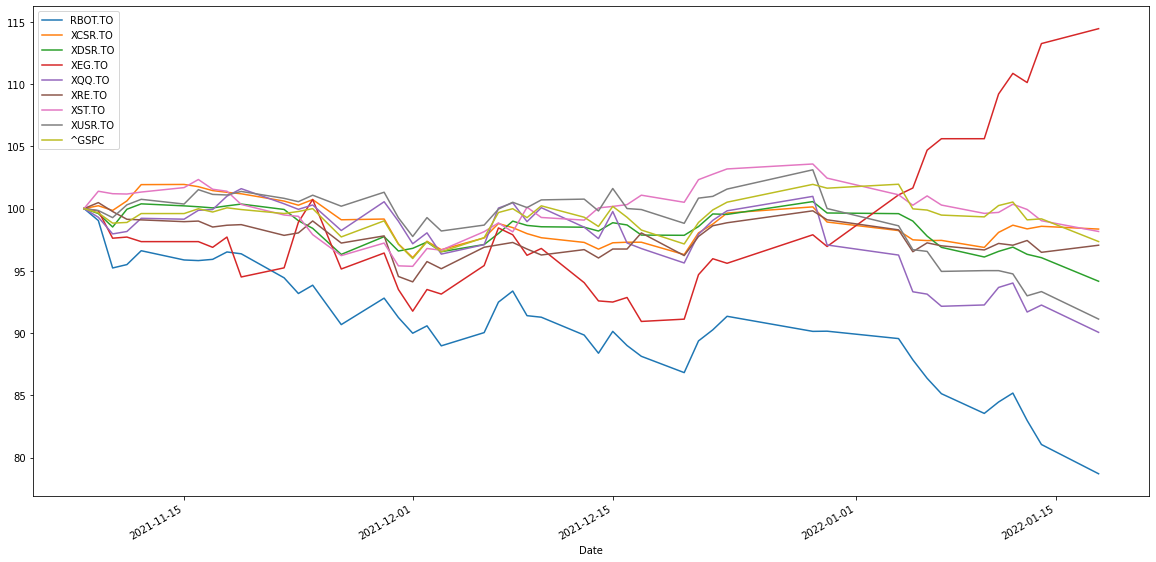

In [22]:
#Voir l'évolution des prix dans le temps 
(Donnees_nan / Donnees_nan.iloc[0]*100).plot(figsize=(20, 10))

In [ ]:
## test 